In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
def f(x,y):
    return x+y
def soln(x):
    return np.exp(x)-x-1

In [43]:
def euler(x,h):
    y=np.zeros(len(x))
    for i in range(1,len(x)):
        y[i]=y[i-1]+h*f(x[i-1],y[i-1])
    return y

In [44]:
def taylor(x,h):
    y=np.zeros(len(x))
    for i in range(1,len(x)):
        y1=f(x[i-1],y[i-1])
        y2=1+f(x[i-1],y[i-1])
        y3=1+f(x[i-1],y[i-1])
        y4=1+f(x[i-1],y[i-1])
        y[i]=y[i-1]+(y1*h)+(y2*h*h)/2+(y3*h*h*h)/6+(y4*h*h*h*h)/24
    return y


In [45]:
def rk(x,h):
    y = np.zeros(len(x))
    for i in range(1, len(x)):
        k0=h*f(x[i-1],y[i-1])
        k1=h*f(x[i-1]+h/2,y[i-1]+k0/2)
        k2=h*f(x[i-1]+h/2,y[i-1]+k1/2)
        k3=h*f(x[i-1]+h,y[i-1]+k2)
        y[i]=y[i-1]+(k0+2*k1+2*k2+k3)/6
    return y

In [46]:
def tabular(x,y1,y2):
    data={
        "Number" : x,
        "Exact Solution" : y1,
        "Soltion from Numerical Method" :y2
    }
    df=pd.DataFrame(data)
    plt.plot(x, y1, label = "Exact Solution")
    plt.scatter(x, y2, c='r', label = "Solution via Numerical Method")
    plt.legend()
    plt.show()
    return df

In [47]:
def main():
    h=float(input("Enter the inverval you want:"))
    xm=float(input("Enter the  maximum x you want:"))
    print("Options for methods:")
    print("1 for Euler's Method.\n2 for Fourth order Taylor's expansion.\n3 for Fourth order Runge Kutta.")
    c=input("Enter your choice:")
    x=[]
    i=0
    while(h*i<=xm):
        x.append(h*i)
        i+=1
    ye=np.array([soln(xi) for xi in x])
    if c=='1':
        y=euler(x,h)
        print(tabular(x,ye,y))
    elif c=='2':
        y=taylor(x,h)
        print(tabular(x,ye,y))
    elif c=='3':
        y=rk(x,h)
        print(tabular(x,ye,y))
    else:
        print("Invalid choice.")

Options for methods:
1 for Euler's Method.
2 for Fourth order Taylor's expansion.
3 for Fourth order Runge Kutta.


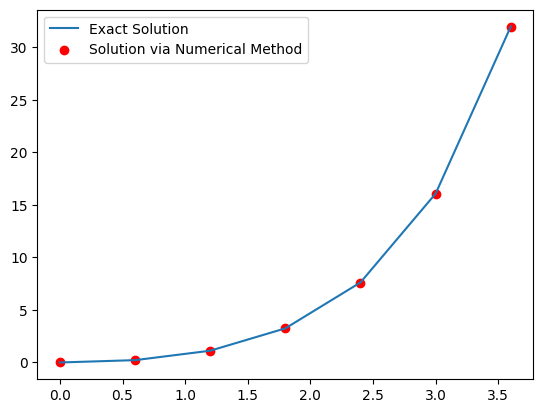

   Number  Exact Solution  Soltion from Numerical Method
0     0.0        0.000000                       0.000000
1     0.6        0.222119                       0.221400
2     1.2        1.120117                       1.117498
3     1.8        3.249647                       3.242491
4     2.4        7.623176                       7.605793
5     3.0       16.085537                      16.045951
6     3.6       31.998234                      31.911695


In [48]:
main()